# Mask R-CNN Training (Demo)


This notebook shows how to train Mask R-CNN on your own dataset.
This is a demo version which allows you to train your detector for 1 class.

The full tutorial is available here: [Tutorial](https://pysource.com/2021/08/10/train-mask-r-cnn-for-image-segmentation-online-free-gpu)

---

**With the FULL VERSION YOU CAN:**
- Train for multiple classes
- Improve accuracy (longer training and bigger images)
- Import the custom detector on Python with Opencv
- Run detector in realtime on a Video or from a Webcam
- Continue the training (if interrupted)
- Integration with Google Drive (to save there weigths and images)
- Evaluate the accuracy of your Model

You can get the FULL Version here: [Mask RCNN PRO](https://pysource.com/mask-rcnn-training-pro/)

---





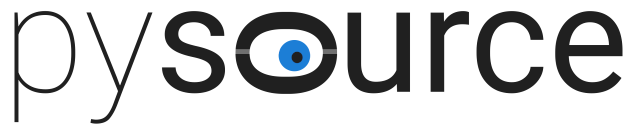

## **1. Installation**

In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/pysource7/Mask_RCNN
import sys
sys.path.append("/content/Mask_RCNN/demo")
from train_mask_rcnn_demo import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 4.0 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1026, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 1026 (delta 35), reused 62 (delta 34), pack-reused 959
Receiving objects: 100% (1026/1026), 125.28 MiB | 23.62 MiB/s, done.
Resolving deltas: 100% (600/600), done.
VERS 0.2


Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
!nvidia-smi

## **2. Run Mask-RCNN on Images**

You can load here the image and extract the mask using Mask-RCNN


In [ ]:
# Load Image
img = cv2.imread("/content/IMG_20210731_162020.jpg")

test_model, inference_config = load_inference_model(1), "/content/mask_rcnn_object_0005.h5"
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = model.detect([image])[0]
colors = random_colors(num_classes)

In [ ]:
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])